# Lecture 30
# Chi-Square, Student-t, Multivariate Normal

In [4]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi, t
%matplotlib inline  

plt.xkcd()

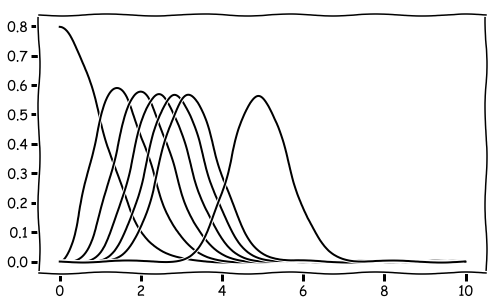

In [15]:
k_values = [1,3,5,7,9,11]
x = np.linspace(0, 10, 1000)

# plot the distributions
fig, ax = plt.subplots(figsize=(8, 4.75))
dist = chi(x)

for k in k_values:
    dist = chi(k, 0)

    plt.plot(x, dist.pdf(x), c='black')

plt.legend()
plt.show()

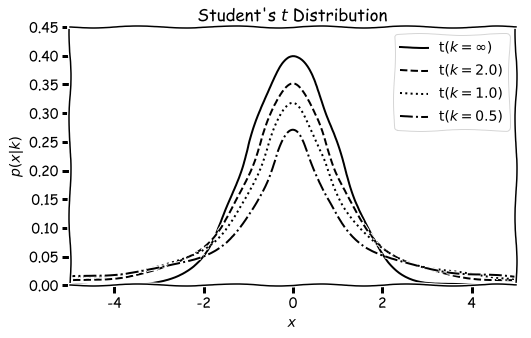

In [2]:
mu = 0
k_values = [1E10, 2, 1, 0.5]
linestyles = ['-', '--', ':', '-.']
x = np.linspace(-10, 10, 1000)

#------------------------------------------------------------
# plot the distributions
fig, ax = plt.subplots(figsize=(8, 4.75))

for k, ls in zip(k_values, linestyles):
    dist = t(k, 0)

    if k >= 1E10:
        label = r'$\mathrm{t}(k=\infty)$'
    else:
        label = r'$\mathrm{t}(k=%.1f)$' % k

    plt.plot(x, dist.pdf(x), ls=ls, c='black', label=label)

plt.xlim(-5, 5)
plt.ylim(0.0, 0.45)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|k)$')
plt.title("Student's $t$ Distribution")

plt.legend()
plt.show()